In [33]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)

# EXPLORACIÓN

### CUSTOMER FLIGHT ACTIVITY

In [3]:
df_flight_activity = pd.read_csv('files\Customer Flight Activity.csv')
df_flight_activity.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\adria\AppData\Local\Temp\ipykernel_4616\3093264718.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_flight_activity = pd.read_csv('files\Customer Flight Activity.csv')


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_flight_activity.shape #registros y columnas

(405624, 10)

In [5]:
df_flight_activity.describe().T # visión general

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


- 1º Número de cliente(min): 100018
- 1º Año a contar (min): 2017
- Último año(max): 2018
- Flights booked: min = 0; max = 21
- Companions: max 11
- Total flights: max 32
- Distancias: 0 - 6293
- Puntos acumulados: 0 - 676.5
- P. Canjeados: 0 - 876
- Dólares canjeados: 0 - 71

In [6]:
df_flight_activity.info() # tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [61]:
df_flight_activity.isnull().sum() # Comprobamos nulos

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

No hay nulos.¡Pero hemos visto ceros!¡Muchos!

In [66]:
# Creo una función para teneer en un diccionario reflejado cuántos 0 hay por columna
def cuantos_ceros(df):
    ceros_por_columna = {}
    for col in df.columns:
        num_ceros = (df[col]==0).sum()
        if num_ceros>0:
            ceros_por_columna[col] = num_ceros
    return ceros_por_columna

In [69]:
ceros = cuantos_ceros(df_flight_activity)
ceros

{'flights_booked': 196128,
 'flights_with_companions': 295023,
 'total_flights': 196128,
 'distance': 196128,
 'points_accumulated': 196128,
 'points_redeemed': 379579,
 'dollar_cost_points_redeemed': 379579}

In [ ]:
df_flight_activity = df_flight_activity.drop_duplicates() # Elimina duplicados

### CUSTOMER LOYALTY HISTORY

In [72]:
df_loyalty_history = pd.read_csv('files/Customer Loyalty History.csv')
df_loyalty_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [73]:
df_loyalty_history.shape

(16737, 16)

In [74]:
df_loyalty_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


- Loyalty Number: 100100018 - 999986 (igual que en flight activity)
- Salary: MINIMO NEGATIVO(?) - max 407228
- CLV : minimo 1898 - maximo 83325
- Enrollment year: 2012 - 2018
- Cancellation Year: 2013 - 2018
- Cancellation Month: 1 - 12 (tiene sentido porque son los meses del año)

In [75]:
df_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [76]:
df_loyalty_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [77]:
# Por curiosidad, miro las cancelaciones y hago un dataframe sólo con las cancelaciones.
df_not_null_history = df_loyalty_history[df_loyalty_history['Cancellation Year'].notna()]
df_not_null_history

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
19,354730,Canada,New Brunswick,Fredericton,E3B 2H2,Female,College,NaN,Married,Star,3885.46,Standard,2014,10,2018.0,1.0
31,201574,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,51375.0,Married,Star,3893.31,Standard,2015,4,2015.0,12.0
39,834891,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,54460.0,Married,Star,3911.12,Standard,2017,3,2017.0,4.0
45,733338,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,80697.0,Married,Star,3919.37,Standard,2016,6,2017.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018.0,12.0
16713,969719,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,88356.0,Married,Star,40235.97,Standard,2016,5,2017.0,1.0
16718,795743,Canada,Ontario,Thunder Bay,K8T 5M5,Male,College,NaN,Married,Star,43019.01,Standard,2013,11,2014.0,7.0
16730,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0


# LIMPIEZA

## DATOS FLIGHT ACTIVITY

### DUPLICADOS

In [96]:
df_flight_activity[df_flight_activity.duplicated()] # duplicados

,loyalty_number,year,month,flights_booked,distance,points_accumulated


### CAMBIO NOMBRES DE COLUMNAS
 Para que sea más fácil trabajar con ellas

In [97]:
# Cambio nombres de columnas para trabajar más facilmente con ellas

df_flight_activity.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked', 'distance',
       'points_accumulated'],
      dtype='object')

In [98]:
def cambiar_nombres_col(df):
    for col in df.columns:
        df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df
# Cambiar espacios por barras bajas y convertir a minúsculas. Esto lo usaré también en el siguiente df

In [99]:
cambiar_nombres_col(df_flight_activity)
df_flight_activity.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked', 'distance',
       'points_accumulated'],
      dtype='object')

## DATOS LOYALTY HISTORY

### CAMBIO NOMBRES DE COLUMNAS

In [ ]:
cambiar_nombres_col(df_loyalty_history) # Usamos la función que hemos creado antes
df_loyalty_history.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

### LOS SALARIES NEGATIVOS!

In [85]:
# Primero reviso cuántos registros hay negativos
df_loyalty_history[df_loyalty_history['salary'] < 0].shape[0]

0

In [83]:
# Solo son 20, serán por error. Los corrijo pasándolos a valroes absolutos.
df_loyalty_history['salary'] = df_loyalty_history['salary'].abs()
df_loyalty_history['salary'].min() # Ahora el mínimo no podrá ser negativo. Si lo es, lo he hecho mal.

9081.0

## SELECCIÓN DE COLUMNAS A ELIMINAR


**PREGUNTAS A RESPONDER**
1. ¿Cómo se distribuye la **cantidad de vuelos reservados** por **mes** durante el año?
2. ¿Existe una relación entre la **distancia de los vuelos** y los **puntos acumulados** por los cliente?
3. ¿Cuál es la distribución de los clientes por **provincia o estado**?
4. ¿Cómo se compara el **salario** promedio entre los diferentes **niveles educativos** de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de **tarjetas de fidelidad**?
6. ¿Cómo se distribuyen los clientes según su **estado civil y género**?

**EN LAS PREGUNTAS SE MENCIONA:**

- Cantidad de vuelos reservados
- Mes del año
- Distancia de vuelos
- Puntos acumulados
- Provincias y Estados clientes
- Salarios
- Niveles educativos
- Tarjetas de fidelidad
- Estado civil y género

### COLUMNAS FLIGHT ACTIVITY
 0. loyalty_number *  
 1. year  *     
 2. month *
 3. flights_booked  * 
 4. flights_with_companions (borrar)
 5. total_flights (borrar)     
 6. distance *            
 7. points_accumulated *   
 8. points_redeemed   (borrar)    
 9. dollar_cost_points_redeemed (borrar)


### COLUMNAS LOYALTY HISTORY
 0. loyalty_number *
 1. country*
 2. province*
 3. city *
 4. postal_code (borrar)
 5. gender * 
 6. education *
 7. salary *
 8. marital_status  *
 9. loyalty_card  *
 10. clv (borrar)
 11. enrollment_type *
 12. enrollment_year 
 13. enrollment_month 
 14. cancellation_year
 15. cancellation_month

## ELIMINACIÓN DE COLUMNAS

### FLIGHT ACTIVITY

In [70]:
# Con los prints nos aseguraremos de que se han borrado las columnas
print(f"Antes de eliminar las columnas el DF tiene {df_flight_activity.shape[0]} filas y {df_flight_activity.shape[1]} columnas.\n-----")

columnas_eliminar = ['flights_with_companions',
                     'total_flights',
                     'points_redeemed',
                     'dollar_cost_points_redeemed']

df_flight_activity = df_flight_activity.drop(columnas_eliminar, axis=1)

print(f"Tras eliminar las columnas el DF tiene {df_flight_activity.shape[0]} filas y {df_flight_activity.shape[1]} columnas.\n-----")

Antes de eliminar las columnas el DF tiene 403760 filas y 10 columnas.
-----
Tras eliminar las columnas el DF tiene 403760 filas y 6 columnas.
-----


### LOYALTY HISTORY

Aquí solo queremos borrar dos columnas: postal code y clv

In [88]:
# Con los prints nos aseguraremos de que se han borrado las columnas
print(f"Antes de eliminar las columnas el DF tiene {df_loyalty_history.shape[0]} filas y {df_loyalty_history.shape[1]} columnas.\n-----")

columnas_eliminar = ['postal_code',
                     'clv']

df_loyalty_history = df_loyalty_history.drop(columnas_eliminar, axis=1)

print(f"Tras eliminar las columnas el DF tiene {df_loyalty_history.shape[0]} filas y {df_loyalty_history.shape[1]} columnas.\n-----")

Antes de eliminar las columnas el DF tiene 16737 filas y 16 columnas.
-----
Tras eliminar las columnas el DF tiene 16737 filas y 14 columnas.
-----


# UNIÓN

## MERGE()
Utilizo merge() porque es el método que me permite unir dataframes basándome en colunas comunes. En este caso, necesitamos unir las columnas de tal manera que se tenga en cuenta que la columna loyalty_number es común.

Queremos preservar todas las filas de df_flight_activity para seguir manteniendo los valores segregados por meses del año. Por eso, df_flight_activity será nuestro left.

In [89]:
df_combinado = df_flight_activity.merge(df_loyalty_history, on='loyalty_number', how='left')
df_combinado

,loyalty_number,year,month,flights_booked,distance,points_accumulated,country,province,city,gender,education,salary,marital_status,loyalty_card,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,1521,152.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,2030,203.0,Canada,Ontario,Toronto,Male,College,NaN,Single,Nova,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,1200,120.0,Canada,British Columbia,Dawson Creek,Female,College,NaN,Divorced,Nova,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0.0,Canada,British Columbia,Vancouver,Male,Bachelor,63253.0,Married,Star,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0.0,Canada,Ontario,Toronto,Female,Bachelor,91163.0,Divorced,Star,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0.0,Canada,Ontario,Toronto,Male,College,NaN,Married,Aurora,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0.0,Canada,Newfoundland,St. John's,Male,Doctor,217943.0,Single,Nova,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,1233,123.0,Canada,Quebec,Quebec City,Female,Bachelor,47670.0,Married,Nova,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0.0,Canada,British Columbia,Victoria,Male,College,NaN,Married,Star,Standard,2018,7,NaN,NaN


### VERIFICO CONSISTENCIA Y CORRIJO DATOS Y/O AJUSTO.

In [90]:
df_combinado.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
flights_booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
points_accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
salary,301500.0,79371.732902,34726.433958,9081.0,59262.0,73479.0,88606.0,407228.0
enrollment_year,403760.0,2015.250716,1.979427,2012.0,2014.0,2015.0,2017.0,2018.0
enrollment_month,403760.0,6.667555,3.398829,1.0,4.0,7.0,10.0,12.0
cancellation_year,49650.0,2016.504350,1.380482,2013.0,2016.0,2017.0,2018.0,2018.0


Parece que los datos son lógicos y se mantienen bien. Aún así, los NaN pueden ser problemáticos. Preferimos cambiarlos por 0 en las columnas numéricas.

In [92]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loyalty_number      403760 non-null  int64  
 1   year                403760 non-null  int64  
 2   month               403760 non-null  int64  
 3   flights_booked      403760 non-null  int64  
 4   distance            403760 non-null  int64  
 5   points_accumulated  403760 non-null  float64
 6   country             403760 non-null  object 
 7   province            403760 non-null  object 
 8   city                403760 non-null  object 
 9   gender              403760 non-null  object 
 10  education           403760 non-null  object 
 11  salary              301500 non-null  float64
 12  marital_status      403760 non-null  object 
 13  loyalty_card        403760 non-null  object 
 14  enrollment_type     403760 non-null  object 
 15  enrollment_year     403760 non-nul

In [93]:
col_num = ['cancellation_year', 'cancellation_month','salary']

In [94]:
for col in col_num:
    df_combinado[col] = df_combinado[col].fillna(0).astype(int)


In [95]:
df_combinado

,loyalty_number,year,month,flights_booked,distance,points_accumulated,country,province,city,gender,education,salary,marital_status,loyalty_card,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,1521,152.0,Canada,Alberta,Edmonton,Female,Bachelor,92552,Married,Aurora,Standard,2016,8,0,0
1,100102,2017,1,10,2030,203.0,Canada,Ontario,Toronto,Male,College,0,Single,Nova,Standard,2013,3,0,0
2,100140,2017,1,6,1200,120.0,Canada,British Columbia,Dawson Creek,Female,College,0,Divorced,Nova,Standard,2016,7,0,0
3,100214,2017,1,0,0,0.0,Canada,British Columbia,Vancouver,Male,Bachelor,63253,Married,Star,Standard,2015,8,0,0
4,100272,2017,1,0,0,0.0,Canada,Ontario,Toronto,Female,Bachelor,91163,Divorced,Star,Standard,2014,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0.0,Canada,Ontario,Toronto,Male,College,0,Married,Aurora,Standard,2014,5,0,0
403756,999911,2018,12,0,0,0.0,Canada,Newfoundland,St. John's,Male,Doctor,217943,Single,Nova,Standard,2012,8,0,0
403757,999940,2018,12,3,1233,123.0,Canada,Quebec,Quebec City,Female,Bachelor,47670,Married,Nova,Standard,2017,7,0,0
403758,999982,2018,12,0,0,0.0,Canada,British Columbia,Victoria,Male,College,0,Married,Star,Standard,2018,7,0,0


# VISUALIZACIÓN

## IMPORTACIONES

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ¿Cómo se distribuye la **cantidad de vuelos reservados** por **mes** durante el año?

**Columnas:** flights_booked y month

Uso un **barplot** al estar lidiando con variables numéricas y no querer que las cuente sino que haga una representación usando un promedio.

C:\Users\adria\AppData\Local\Temp\ipykernel_4616\2178018550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='flights_booked', data=df_combinado, palette='viridis')


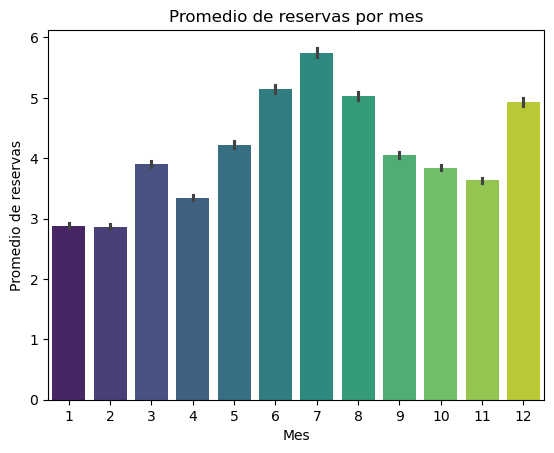

In [112]:
# Creando un barplot para ver cómo varían los flights_booked por mes
sns.barplot(x='month', y='flights_booked', data=df_combinado, palette='viridis')

plt.title('Promedio de reservas por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de reservas')
plt.show()

- Parece que los meses de más reservas son 7(julio) y 12(diciembre) coincidiendo con vacaciones de verano y navidades. 

- En enero y febrero se reservan menos vuelos y en marzo hay un pico de actividad seguramente por la llegada del buen tiempo, la pascua o la semana santa. El buen tiempo explicaría también que el promedio de reservas crezca durante los meses de primavera hasta llegar a su tope en julio y descender poco a poco hasta noviembre.

## 2. ¿Existe una relación entre la **distancia de los vuelos** y los **puntos acumulados** por los cliente?

**Columnas:** points accumulated y distance

Utilizo un **scatterplot** ya que es el método para ver si existe relacion entre dos variables numéricas. 

<Axes: xlabel='points_accumulated', ylabel='distance'>

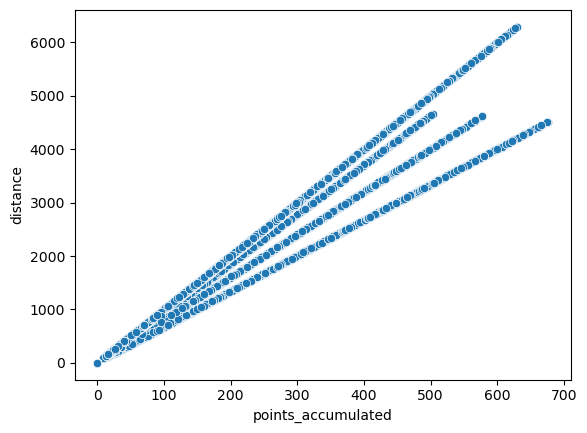

In [110]:
sns.scatterplot(data=df_combinado, x="points_accumulated", y="distance")

Parece que sí que existe una clara relación entre la distancia y los puntos acumulados ya que a mayor distancia mayor los puntos acumulados. Son valores directamente proporcionales

## 3. ¿Cuál es la distribución de los clientes por **provincia o estado**?

**Columnas:** province

 Sabemos que country será siempre Canada. Así que vamos a ver las provincias. Usaré un countplot que contará los registros que exiten por provincia.

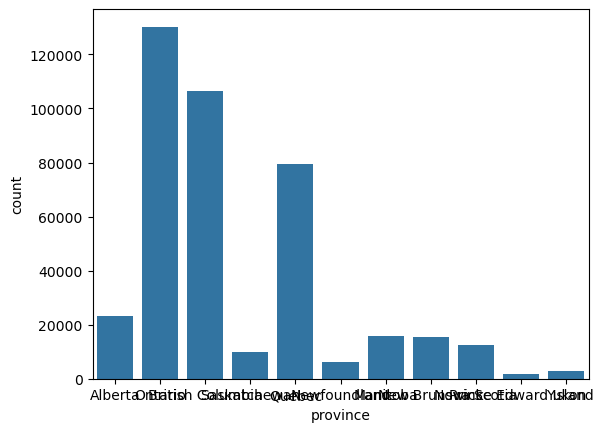

In [129]:
sns.countplot(x='province', data=df_combinado)
plt.show()

Lo rotamos para que se vea mejor

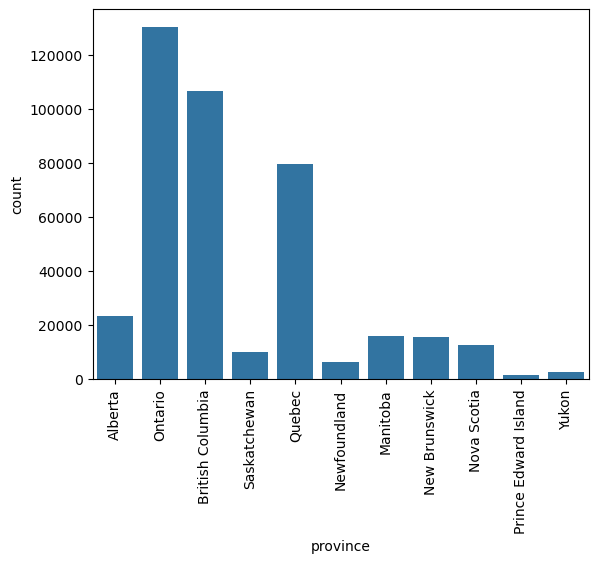

In [130]:
sns.countplot(x='province', data=df_combinado)
plt.xticks(rotation=90)
plt.show()

**Tenemos un problema.** Y es que existen varios registros por loyalty_number... Tendremos que agrupar por provincia y, después, utilizar un barplot.

In [124]:
clientes_por_provincia = df_combinado.groupby('province')['loyalty_number'].nunique().reset_index()
clientes_por_provincia = clientes_por_provincia.sort_values('loyalty_number', ascending=False)

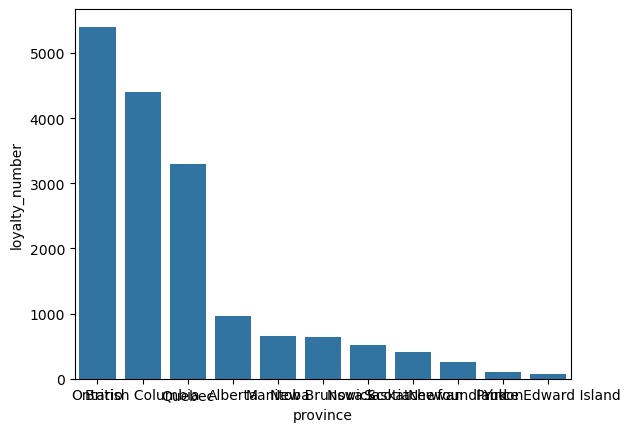

In [127]:
sns.barplot(data=clientes_por_provincia, x='province', y='loyalty_number')
plt.show()

Voy a rotarlo para que se vea mejor

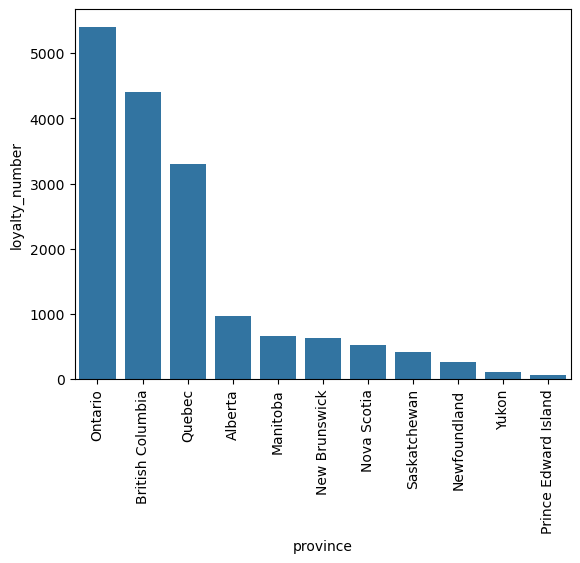

In [128]:
sns.barplot(data=clientes_por_provincia, x='province', y='loyalty_number')
plt.xticks(rotation=90)
plt.show()

- Parece que con el countplot y el barplot son muy parecidos. Seguramente porque todos los loyalty_number están repetidos el mismo número de veces (12, una cada mes)

- Podemos decir que las provincias con más clientes son Ontario, British Columnbia y Queber respectivamente y con gran diferencia de clientes respecto al resto de provincias. 

## 4. ¿Cómo se compara el **salario** promedio entre los diferentes **niveles educativos** de los clientes?

**Columnas:** salary y education

In [132]:
# Sabemos que education es una variable categórica así que vamos a ver cuales son sus valores unicos
df_combinado['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Utilizaré un barplot ya que parece lo más indicado para comparar una variable categórica con una numérica

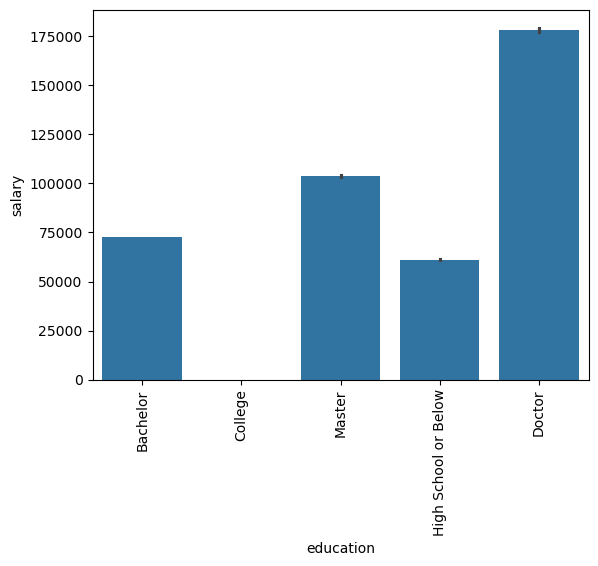

In [137]:
sns.barplot(x='education', y='salary', data=df_combinado)
plt.xticks(rotation=90)
plt.show()

Oh no! La gente que tiene el college no tiene salario? Investigo.

In [144]:
df_combinado[df_combinado['education'] == 'College'][['education', 'salary']]

,education,salary
1,College,0
2,College,0
17,College,0
20,College,0
21,College,0
...,...,...
403747,College,0
403749,College,0
403752,College,0
403755,College,0


In [145]:
(df_combinado[df_combinado['education'] == 'College']['salary'] == 0).sum()

102260

Vale. Parece que todos los datos en college son 0 en salary. Seguramente no existieron registros. Recordemos que hemos cambiado los NaN por 0. Aún así, podemos ver que cuanto más alto sea el nivel educativo, más alto es el salario. 

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de **tarjetas de fidelidad**?

**Columnas:** loyalty_card

Este es otro caso de countplot que cuente el número de registros para cada categoría de una columna

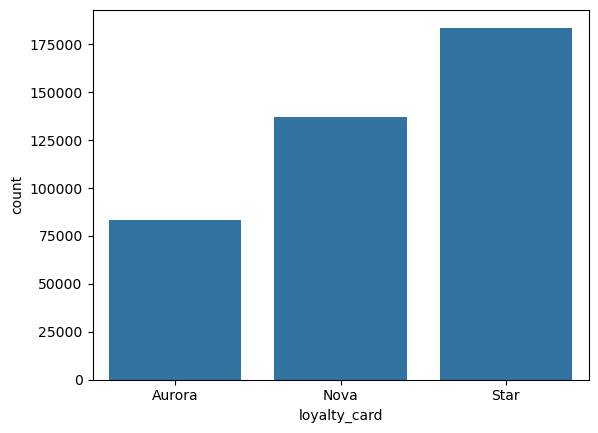

In [147]:
sns.countplot(x='loyalty_card', data=df_combinado)
plt.show()

Parece que la mayoría de clientes tienen la tarjeta star, seguido de nova y por último aurora.

## 6. ¿Cómo se distribuyen los clientes según su **estado civil y género**?

**Columnas:** marital_status y gender

Tendremos que utilizar un countplot ya que son dos variables categóricas y necesitamos que se cuenten los registros. Vamos a usar hue para crear una 'tercera dimensión' que será gender.

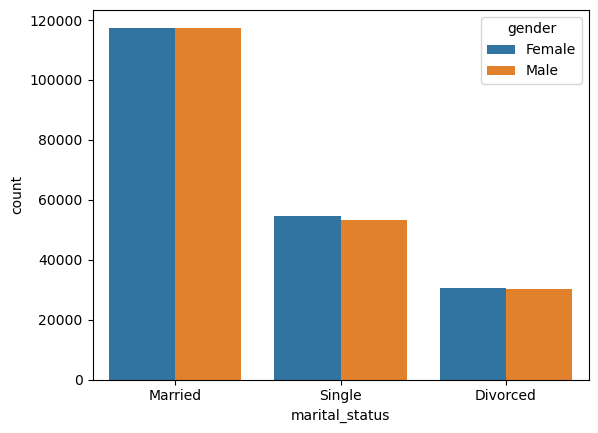

In [151]:
sns.countplot(x='marital_status',hue='gender', data=df_combinado)
plt.show()

Vemos que la mayoría de los clientes están casados, tanto hombres como mujeres. No existe diferencia entre estados civiles y género. 